In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [214]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

In [215]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [194]:
# set up lists to hold reponse info
lat = []
temp = []
humid = []
cloud = []
wind = []
found_cities = []
x = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        found_cities.append(response['name'])
    except KeyError:
        print(city + ' not found')
    else:
        print(response['name'])
        
        
## HOW TO NUMBER CITIES?
## HOW TO OUTPUT CSV AND JPG? 

Zheleznodorozhnyy
Souillac
Rikitea
Upernavik
Kapaa
Beyneu
Ushuaia
Albany
Porto-Novo
Castro
Chui
Ancud
Port-Gentil
New Norfolk
Turukhansk
Kumul
illoqqortoormiut not found
Porto Santo
Clyde River
grand river south east not found
Mehamn
Vaini
Ondangwa
Beruwala
Juradó
Sakakah
Punta Arenas
Atuona
Palmer
East London
Necochea
belushya guba not found
Kasempa
Hithadhoo
São Filipe
Marabá
Luena
ambodifototra not found
Hasaki
Skjervøy
Barrow
Bengkulu
Cayenne
Santa Cruz de la Sierra
Mossendjo
sentyabrskiy not found
Chokurdakh
Mataura
Avarua
Cape Town
Ilulissat
Mirny
Nikolskoye
amderma not found
Murgab
Maniitsoq
Saint-Augustin
Geraldton
Sungai Penuh
Arlit
Ribeira Grande
Braintree
Saint-Philippe
taolanaro not found
Gambēla
Khovd
Hobart
Mangit
Xichang
Strezhevoy
Kahului
Ostrovnoy
Ţahţā
Thompson
Provideniya
Sinnamary
Namatanai
Saint George
Lonār
Havre-St-Pierre
Wanning
Ghorāwal
Medicine Hat
Beloha
Oranjemund
Coyhaique
Sechura
Bratsk
Kudahuvadhoo
Lagoa
Nanortalik
Sittwe
Ibanda
Verkhoyansk
Acajutla
Ürümq

In [195]:
weather_dic = {
    'city' : found_cities,
    'latitude' : lat,
    'temperature' : temp,
    'humidity' : humid,
    'cloudy' : cloud,
    'wind speed' : wind  
    }

weather_data2 = pd.DataFrame(weather_dic)
weather_data = weather_data2.loc[weather_data2['humidity']< 101]

In [196]:
weather_data

,city,latitude,temperature,humidity,cloudy,wind speed
0,Zheleznodorozhnyy,55.75,59.59,93,0,6.71
1,Souillac,-20.52,64.40,77,75,12.75
2,Rikitea,-23.12,66.29,62,0,18.54
3,Upernavik,72.79,49.69,64,100,6.11
4,Kapaa,22.08,81.03,65,20,17.22
...,...,...,...,...,...,...
549,Río Gallegos,-51.62,24.80,92,0,3.36
550,Flin Flon,54.77,70.50,60,73,7.72
551,Shelburne,44.08,68.32,77,75,2.68
552,Seybaplaya,19.65,78.80,88,90,13.87


Text(0, 0.5, 'Temperature')

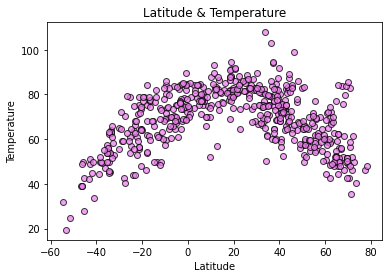

In [197]:
#latitude vs temperature
plt.scatter(weather_data['latitude'],weather_data['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

Text(0, 0.5, 'Humidty')

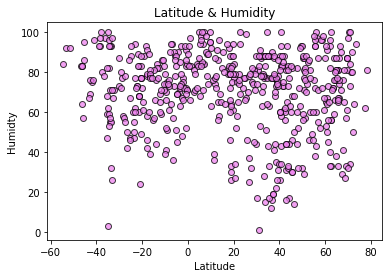

In [198]:
#latitude vs humidty
plt.scatter(weather_data['latitude'], weather_data['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

Text(0, 0.5, 'Cloudiness')

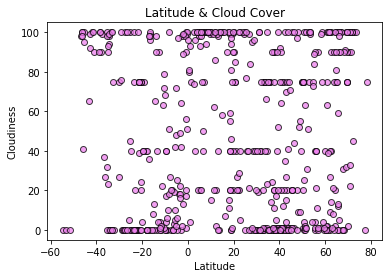

In [199]:
#latitude vs cloudiness
plt.scatter(weather_data['latitude'], weather_data['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0, 0.5, 'Wind Speed')

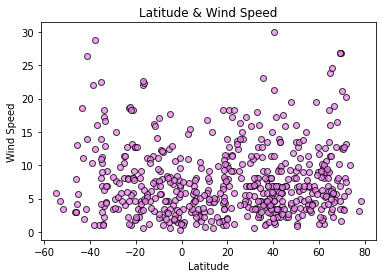

In [200]:
#latitude vs wind speed
plt.scatter(weather_data['latitude'],weather_data ['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [201]:
northern = weather_data.loc[weather_data['latitude'] > 0]

In [202]:
southern = weather_data.loc[weather_data['latitude'] < 0]

Text(0, 0.5, 'Temperature')

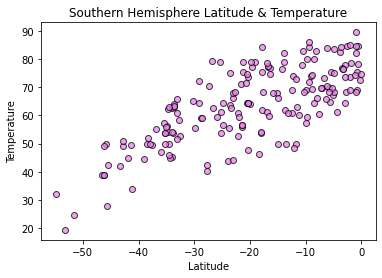

In [203]:
# southern latitude vs temperature
plt.scatter(southern['latitude'], southern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

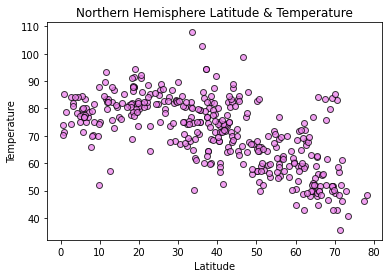

In [204]:
# northern latitude vs temperature
plt.scatter(northern['latitude'],northern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

Text(0, 0.5, 'Humidty')

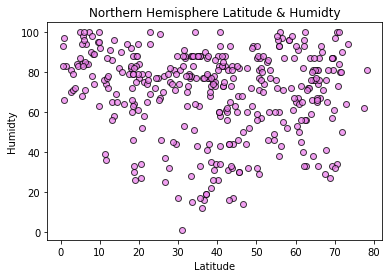

In [205]:
# northern latitude vs humidity
plt.scatter(northern['latitude'],northern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Humidty")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

Text(0, 0.5, 'Humidity')

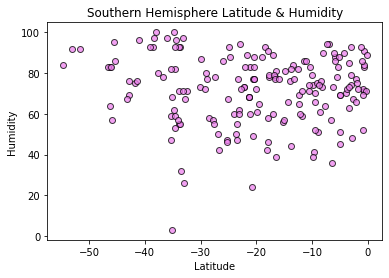

In [206]:
# southern latitude vs humidity
plt.scatter(southern['latitude'],southern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

Text(0, 0.5, 'Cloudiness')

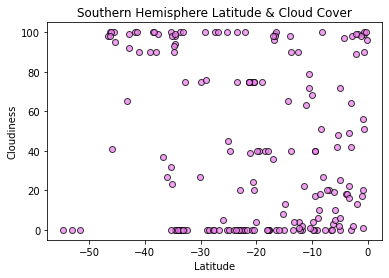

In [207]:
# southern latitude vs cloudiness
plt.scatter(southern['latitude'],southern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0, 0.5, 'Cloudiness')

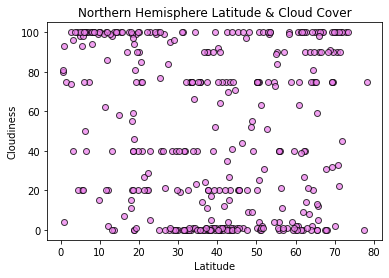

In [208]:
# northern latitude vs cloudiness
plt.scatter(northern['latitude'],northern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0, 0.5, 'Wind Speed')

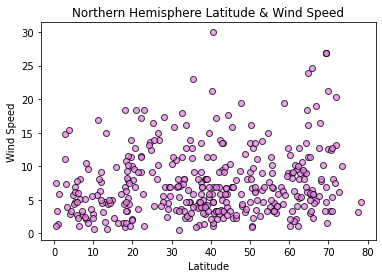

In [209]:
# northern latitude vs wind
plt.scatter(northern['latitude'],northern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

Text(0, 0.5, 'Wind Speed')

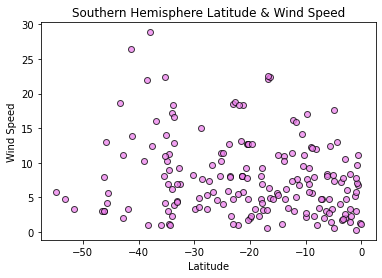

In [210]:
# southern latitude vs wind
plt.scatter(southern['latitude'],southern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)
plt.title("Southern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [211]:
#linregress
#(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'],southern['wind speed'])

In [212]:
weather_data.to_csv(r'../output_data/cities.csv')